In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

# **PDF**

In [3]:
def uniformPdf(t,a,b):
  boolval=((t>=a ) & (t<=b))
  return (1/(b-a))*(boolval==1)
  
def exponentialPdf(t,lamb):
  boolval=(t>=0)&(lamb>0)
  return (lamb*np.exp(-lamb*t))*(boolval==1)

def gammaPdf(t,alpha,beta):
  boolval=(t>0)&(alpha>0)&(beta>0)
  return ((pow(beta,alpha)*pow(t,alpha-1)*np.exp(-beta*t))/(math.gamma(alpha)))*(boolval==1)

def BetaPdf(t,alpha,beta):
  boolval=(t>=0)&(t<=1)&(alpha>0)&(beta>0)
  return ((pow(t,alpha-1.0)*pow(1.0-t,beta-1.0))*(math.gamma(alpha+beta)/(math.gamma(alpha)*math.gamma(beta))))*(boolval==1)

def GaussianPdf(t,mu,sigma):
  return (1/pow(2*np.pi*sigma**2,.5))*np.exp(-((t-mu)**2)/(2*sigma**2))

def NormalPdf(t):
  return GaussianPdf(t,0,1)

def ChiSquarePdf(t,k):
  if k==1:
    boolval=(t>0)
  else:
    boolval=(t>=0)&(k>0)
  return ((pow(t,(k/2)-1)*np.exp(-t/2))/(pow(2,k/2)*math.gamma(k/2)))*(boolval==1)

# **CDF**

In [4]:
def uniformCdf(t,a,b):
    boolval_1=((t>=a ) & (t<=b))
    boolval_2=(t>b)
    return ((t-a)/(b-a))*(boolval_1==1)+(boolval_2)
 
def exponentialCdf(t,lamb):
  boolval=(t>=0)&(lamb>0)
  return (1-np.exp(-lamb*t))*(boolval==1)

def gammaCdf(t,alpha,beta):
   return ((1/math.gamma(alpha))*max(integrate.quad(lambda x: pow(x,alpha-1)*np.exp(-x), 0, beta*t)))*(t>0)


def BetaCdf(t,alpha,beta):
   boolval=(t>=0)&(t<=1)&(alpha>0)&(beta>0)
   beta_a_b=(math.gamma(alpha+beta)/(math.gamma(alpha)*math.gamma(beta)))
   return max(integrate.quad(lambda x: pow(x,alpha-1)*pow(1-x,beta-1),0,t))*beta_a_b*(boolval==1)


def GaussianCdf(t,mu,sigma):
  return max(integrate.quad(lambda x:np.exp(-x**2/2),-math.inf,(t-mu)/sigma))*(1/(pow(2*np.pi,.5)))


def NormalCdf(t):
  return GaussianCdf(t,0,1)

def ChiSquareCdf(t,k):
  if k==1:
    boolval=(t>0)
  else:
    boolval=(t>=0)&(k>0)
  return ((1/math.gamma(k/2))*max(integrate.quad(lambda x: pow(x,k/2-1)*np.exp(-x), k/2, t/2)))*(boolval==1)

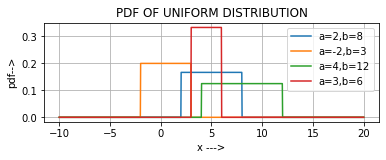

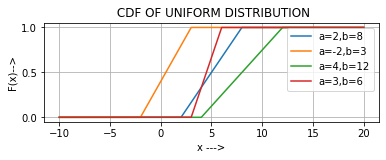

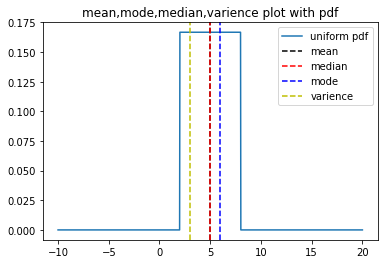

In [5]:
x=np.linspace(-10,20,1000)
plt.subplot(2,1,1)
plt.plot(x,uniformPdf(x,2,8),label="a=2,b=8")
# plt.plot(x,ExpectVal(uniformCdf(x,2,8)),label="mean")
plt.plot(x,uniformPdf(x,-2,3),label="a=-2,b=3")
plt.plot(x,uniformPdf(x,4,12),label="a=4,b=12")
plt.plot(x,uniformPdf(x,3,6),label="a=3,b=6")
plt.legend()
plt.ylabel("pdf-->")
plt.xlabel("x --->")
plt.title("PDF OF UNIFORM DISTRIBUTION")
plt.grid()
plt.show()
plt.subplot(2,1,2)
plt.plot(x,uniformCdf(x,2,8),label="a=2,b=8")
plt.plot(x,uniformCdf(x,-2,3),label="a=-2,b=3")
plt.plot(x,uniformCdf(x,4,12),label="a=4,b=12")
plt.plot(x,uniformCdf(x,3,6),label="a=3,b=6")
plt.legend()
plt.ylabel("F(x)-->")
plt.xlabel("x --->")
plt.title(" CDF OF UNIFORM DISTRIBUTION")
plt.grid()
plt.show()


plt.plot(x,uniformPdf(x,2,8),label="uniform pdf")
list1=["mean","median","mode","varience"]
list2=[5,5,6,3]
colors=['k','r','b','y']
for i in range(len(list1)):
  plt.axvline(x=list2[i],color=colors[i],linestyle='--',label=list1[i])
plt.legend()
plt.title("mean,mode,median,varience plot with pdf")
plt.show()

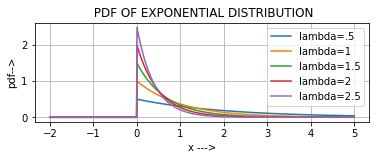

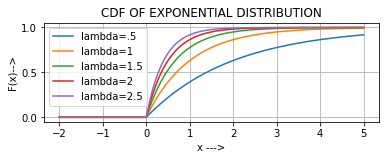

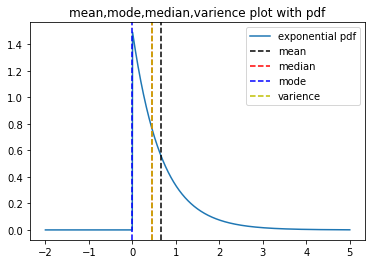

In [6]:
x=np.linspace(-2,5,1000)
plt.subplot(2,1,1)
plt.plot(x,exponentialPdf(x,.5),label="lambda=.5")
plt.plot(x,exponentialPdf(x,1),label="lambda=1")
plt.plot(x,exponentialPdf(x,1.5),label="lambda=1.5")
plt.plot(x,exponentialPdf(x,2),label="lambda=2")
plt.plot(x,exponentialPdf(x,2.5),label="lambda=2.5")
plt.legend()
plt.ylabel("pdf-->")
plt.xlabel("x --->")
plt.title(" PDF OF EXPONENTIAL DISTRIBUTION")
plt.grid()
plt.show()
plt.subplot(2,1,2)
plt.plot(x,exponentialCdf(x,.5),label="lambda=.5")
plt.plot(x,exponentialCdf(x,1),label="lambda=1")
plt.plot(x,exponentialCdf(x,1.5),label="lambda=1.5")
plt.plot(x,exponentialCdf(x,2),label="lambda=2")
plt.plot(x,exponentialCdf(x,2.5),label="lambda=2.5")
plt.legend()
plt.ylabel("F(x)-->")
plt.xlabel("x --->")
plt.title("CDF OF EXPONENTIAL DISTRIBUTION")
plt.grid()
plt.show()

plt.plot(x,exponentialPdf(x,1.5),label="exponential pdf")
list1=["mean","median","mode","varience"]
list2=[0.66,.462,0,.444]
colors=['k','r','b','y']
for i in range(len(list1)):
  plt.axvline(x=list2[i],color=colors[i],linestyle='--',label=list1[i])
plt.legend()
plt.title("mean,mode,median,varience plot with pdf")
plt.show()

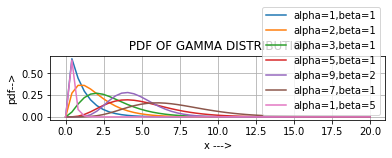

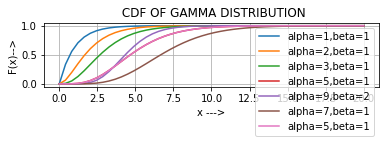

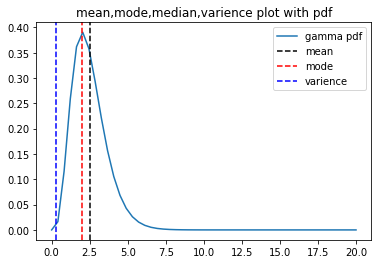

In [7]:
x=np.linspace(0,20,50)
plt.subplot(3,1,1)
plt.plot(x,[gammaPdf(i,1,1) for i in x],label="alpha=1,beta=1")
plt.plot(x,[gammaPdf(i,2,1) for i in x],label="alpha=2,beta=1")
plt.plot(x,[gammaPdf(i,3,1) for i in x],label="alpha=3,beta=1")
plt.plot(x,[gammaPdf(i,5,1) for i in x],label="alpha=5,beta=1")
plt.plot(x,[gammaPdf(i,9,2) for i in x],label="alpha=9,beta=2")
plt.plot(x,[gammaPdf(i,7,1) for i in x],label="alpha=7,beta=1")
plt.plot(x,[gammaPdf(i,1,5) for i in x],label="alpha=1,beta=5")
plt.legend()
plt.ylabel("pdf-->")
plt.xlabel("x --->")
plt.title(" PDF OF GAMMA DISTRIBUTION")
plt.grid()
plt.show()

plt.subplot(3,1,2)
plt.plot(x,[gammaCdf(i,1,1) for i in x],label="alpha=1,beta=1")
plt.plot(x,[gammaCdf(i,2,1) for i in x],label="alpha=2,beta=1")
plt.plot(x,[gammaCdf(i,3,1) for i in x],label="alpha=3,beta=1")
plt.plot(x,[gammaCdf(i,5,1) for i in x],label="alpha=5,beta=1")
plt.plot(x,[gammaCdf(i,9,2) for i in x],label="alpha=9,beta=2")
plt.plot(x,[gammaCdf(i,7,1) for i in x],label="alpha=7,beta=1")
plt.plot(x,[gammaCdf(i,5,1) for i in x],label="alpha=5,beta=1")
plt.legend()
plt.ylabel("F(x)-->")
plt.xlabel("x --->")
plt.grid()
plt.title(" CDF OF GAMMA DISTRIBUTION")
plt.show()


plt.plot(x,gammaPdf(x,5,2),label="gamma pdf")
list1=["mean","mode","varience"]
list2=[2.5,2,.3125]
colors=['k','r','b','y']
for i in range(len(list1)):
  plt.axvline(x=list2[i],color=colors[i],linestyle='--',label=list1[i])
plt.legend()
plt.title("mean,mode,median,varience plot with pdf")
plt.show()



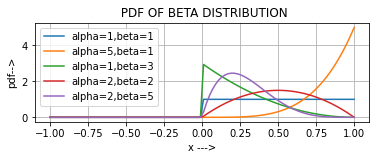

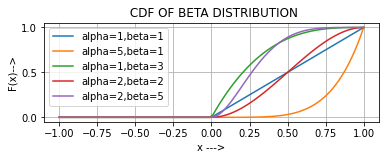

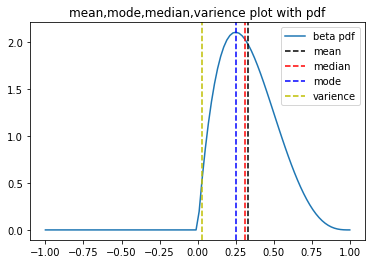

In [8]:
x=np.linspace(-1,1,100)
plt.subplot(2,1,1)
plt.plot(x,BetaPdf(x,1,1),label="alpha=1,beta=1")
plt.plot(x,BetaPdf(x,5,1),label="alpha=5,beta=1")
plt.plot(x,BetaPdf(x,1,3),label="alpha=1,beta=3")
plt.plot(x,BetaPdf(x,2,2),label="alpha=2,beta=2")
plt.plot(x,BetaPdf(x,2,5),label="alpha=2,beta=5")

plt.legend()
plt.ylabel("pdf-->")
plt.xlabel("x --->")
plt.grid()
plt.title(" PDF OF BETA DISTRIBUTION")
plt.show()
plt.subplot(2,1,2)
plt.plot(x,[BetaCdf(i,1,1) for i in x],label="alpha=1,beta=1")
plt.plot(x,[BetaCdf(i,5,1) for i in x],label="alpha=5,beta=1")
plt.plot(x,[BetaCdf(i,1,3) for i in x],label="alpha=1,beta=3")
plt.plot(x,[BetaCdf(i,2,2) for i in x],label="alpha=2,beta=2")
plt.plot(x,[BetaCdf(i,2,5) for i in x],label="alpha=2,beta=5")
plt.grid()
plt.legend()
plt.ylabel("F(x)-->")
plt.xlabel("x --->")
plt.title(" CDF OF BETA DISTRIBUTION")
plt.show()

plt.plot(x,BetaPdf(x,2,4),label="beta pdf")
list1=["mean","median","mode","varience"]
list2=[0.33,.312,.25,.0318]
colors=['k','r','b','y']
for i in range(len(list1)):
  plt.axvline(x=list2[i],color=colors[i],linestyle='--',label=list1[i])
plt.legend()
plt.title("mean,mode,median,varience plot with pdf")
plt.show()

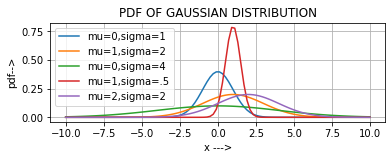

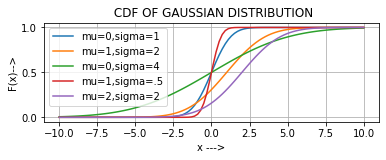

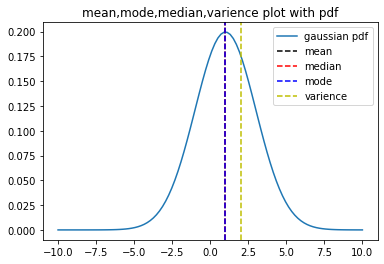

In [9]:
x=np.linspace(-10,10,100)
plt.subplot(2,1,1)
plt.plot(x,GaussianPdf(x,0,1),label="mu=0,sigma=1")
plt.plot(x,GaussianPdf(x,1,2),label="mu=1,sigma=2")
plt.plot(x,GaussianPdf(x,0,4),label="mu=0,sigma=4")
plt.plot(x,GaussianPdf(x,1,.5) ,label="mu=1,sigma=.5")
plt.plot(x,GaussianPdf(x,2,2),label="mu=2,sigma=2")
plt.legend()
plt.ylabel("pdf-->")
plt.xlabel("x --->")
plt.title("PDF OF GAUSSIAN DISTRIBUTION")
plt.grid()
plt.show()
plt.subplot(2,1,2)
plt.plot(x,[GaussianCdf(i,0,1) for i in x],label="mu=0,sigma=1")
plt.plot(x,[GaussianCdf(i,1,2) for i in x],label="mu=1,sigma=2")
plt.plot(x,[GaussianCdf(i,0,4) for i in x],label="mu=0,sigma=4")
plt.plot(x,[GaussianCdf(i,0,.5) for i in x],label="mu=1,sigma=.5")
plt.plot(x,[GaussianCdf(i,2,2) for i in x],label="mu=2,sigma=2")
plt.legend()
plt.ylabel("F(x)-->")
plt.xlabel("x --->")
plt.title(" CDF OF GAUSSIAN DISTRIBUTION")
plt.grid()
plt.show()



plt.plot(x,GaussianPdf(x,1,2),label="gaussian pdf")
list1=["mean","median","mode","varience"]
list2=[1,1,1,2]
colors=['k','r','b','y']
for i in range(len(list1)):
  plt.axvline(x=list2[i],color=colors[i],linestyle="--",label=list1[i])
plt.legend()
plt.title("mean,mode,median,varience plot with pdf")
plt.show()

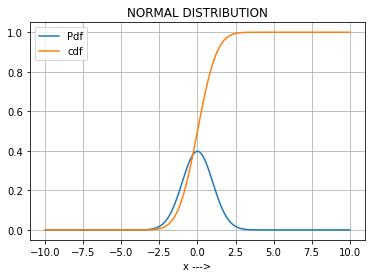

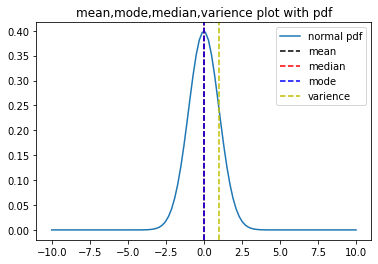

In [10]:
x=np.linspace(-10,10,100)
plt.plot(x,NormalPdf(x),label="Pdf")
plt.plot(x,[NormalCdf(i) for i in x],label="cdf")
plt.legend()
plt.xlabel("x --->")
plt.title("NORMAL DISTRIBUTION")
plt.grid()
plt.show()

plt.plot(x,NormalPdf(x),label="normal pdf")
list1=["mean","median","mode","varience"]
list2=[0,0,0,1]
colors=['k','r','b','y']
for i in range(len(list1)):
  plt.axvline(x=list2[i],color=colors[i],linestyle='--',label=list1[i])
plt.legend()
plt.title("mean,mode,median,varience plot with pdf")
plt.show()

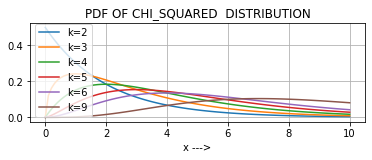

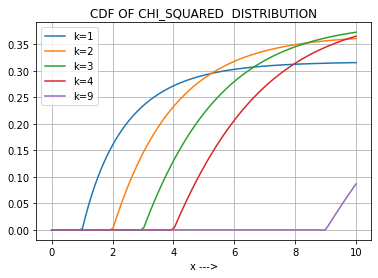

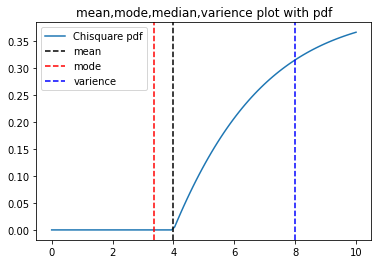

In [11]:
x=np.linspace(0,10,100)
plt.subplot(2,1,1)
plt.plot(x,[ChiSquarePdf(i,2) for i in x],label="k=2")
plt.plot(x,[ChiSquarePdf(i,3) for i in x],label="k=3")
plt.plot(x,[ChiSquarePdf(i,4) for i in x],label="k=4")
plt.plot(x,[ChiSquarePdf(i,5) for i in x],label="k=5")
plt.plot(x,[ChiSquarePdf(i,6) for i in x],label="k=6")
plt.plot(x,[ChiSquarePdf(i,9) for i in x],label="k=9")
plt.grid()
plt.legend()
plt.xlabel("x --->")
plt.title("PDF OF CHI_SQUARED  DISTRIBUTION")
plt.show()
plt.grid()
plt.plot(x,[ChiSquareCdf(i,1) for i in x],label="k=1")
plt.plot(x,[ChiSquareCdf(i,2) for i in x],label="k=2")
plt.plot(x,[ChiSquareCdf(i,3) for i in x],label="k=3")
plt.plot(x,[ChiSquareCdf(i,4) for i in x],label="k=4")
plt.plot(x,[ChiSquareCdf(i,9) for i in x],label="k=9")
plt.legend()
plt.xlabel("x --->")
plt.title("CDF OF CHI_SQUARED  DISTRIBUTION")
plt.show()

plt.plot(x,[ChiSquareCdf(i,4) for i in x],label="Chisquare pdf")
list1=["mean","mode","varience"]
list2=[4,3.37,8]
colors=['k','r','b','y']
for i in range(len(list1)):
  plt.axvline(x=list2[i],color=colors[i],linestyle='--',label=list1[i])
plt.legend()
plt.title("mean,mode,median,varience plot with pdf")
plt.show()

if we will take two or more gaussian independent distribution then its combined version stiil will follow gaussian distribution. new mean will be sum of all indivial mean and new varience will be square root of sum of its individual square of varience.

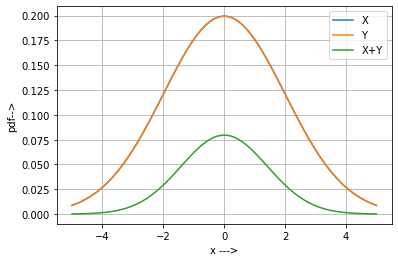

In [12]:


x=np.linspace(-5,5,100)

X=GaussianPdf(x,0,2)
Y=GaussianPdf(x,0,2)

plt.plot(x,X,label="X")
plt.plot(x,Y,label="Y")
plt.plot(x,X**2+Y**2,label="X+Y")
plt.legend()
plt.ylabel("pdf-->")
plt.xlabel("x --->")
plt.grid()

plt.show()


# **Discrete distributions**

In [13]:
def impulse(t):
  return 1*(t==0)

In [14]:
def PMF(x):
  pmf=[]
  for i in range(0,len(x)):
    sum=0.0
    for j in range(0,i+1):
      sum=sum+x[i]*impulse(i-j)
    pmf.append(sum)
  return pmf

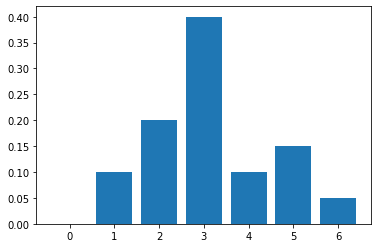

In [15]:
px=[0,.1,.2,.4,.1,.15,.05]
plt.bar([0,1,2,3,4,5,6],PMF(px))
plt.show()

stastics parameter

In [74]:
def Moment(X,n):
  
  return sum([pow(i,n)*X[i] for i in range(len(X))])

def ExpectVal(X):
  return Moment(X,1)

def Variance(X):
  return (Moment(X,2)-pow(Moment(X,1),2))

1

mean1 = 0.1   varieance1 =  0.09
mean2 = 0.5   varieance2 =  0.25
mean3 = 0.8   varieance2 =  0.15999999999999992


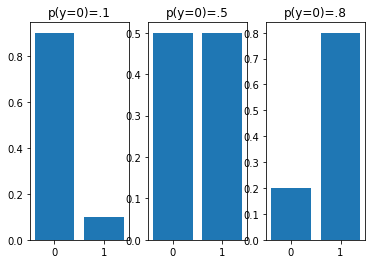

In [76]:
X1=[.9,.1] #p(y=1)
X2=[.5,.5] #p(y=1)
X3=[.2,.8] #p(y=1)
print("mean1 =",ExpectVal(X1),"  varieance1 = ",Variance(X1))
print("mean2 =",ExpectVal(X2),"  varieance2 = ",Variance(X2))
print("mean3 =",ExpectVal(X3),"  varieance2 = ",Variance(X3))
plt.subplot(1,3,1)
plt.bar([0,1],PMF(X1))
plt.title("p(y=0)=.1")
plt.subplot(1,3,2)
plt.bar([0,1],PMF(X2))
plt.title("p(y=0)=.5")
plt.subplot(1,3,3)
plt.bar([0,1],PMF(X3))
plt.title("p(y=0)=.8")

plt.show()

2

In [63]:
def fact(n):  
   if n == 1:  
       return n 
   elif n==0:
       return 1 
   else:  
       return n*fact(n-1)
   

def combination(n,k):
  return (fact(n)/(fact(k)*fact(n-k)))
def bionomialdist(n,k,p):
  return combination(n,k)*pow(p,k)*pow(1-p,n-k)

In [65]:
print(fact(4))

24


mean = 12.0   varieance =  4.799999999999983


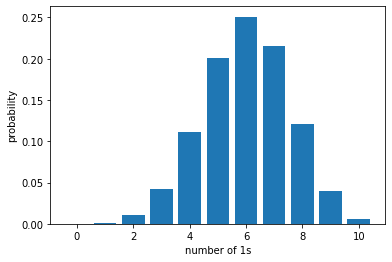

In [79]:
n=10
p=.6
print("mean =",ExpectVal(X),"  varieance = ",Variance(X))
X=[bionomialdist(n,i,p) for i in range(11)]
plt.bar([i for i in range(11)],PMF(X))
plt.xlabel("number of 1s")
plt.ylabel("probability")
plt.show()

3.

In [68]:
def geometricdist(x,p):
  return pow(1-p,x-1)*p

mean = 2.315513060526865   varieance =  7.456429330917489


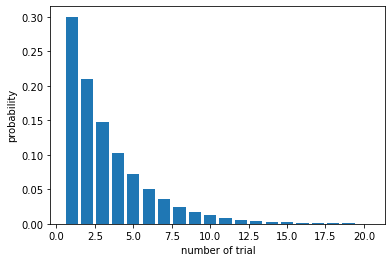

In [80]:
n=20
p=.3
X=[geometricdist(i,p) for i in range(1,21)]
print("mean =",ExpectVal(X),"  varieance = ",Variance(X))
plt.bar([i for i in range(1,21)],PMF(X))
plt.xlabel("number of trial")
plt.ylabel("probability")
plt.show()

4

In [72]:
def poissiondist(lamb,k):
  return (pow(lamb,k)*np.exp(-lamb))/fact(k)

mean = 4.999998273932088   varieance =  4.9999804921609226


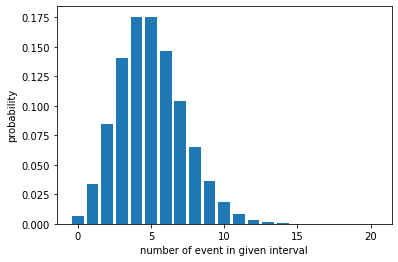

In [81]:
lamb=5
X=[i for i in range(21)]
p=[poissiondist(lamb,k) for k in X]
print("mean =",ExpectVal(p),"  varieance = ",Variance(p))
plt.bar(X,PMF(p))
plt.xlabel("number of event in given interval")
plt.ylabel("probability")
plt.show()

# **Signal measures**

In [17]:
#  Function for computing convolution of 2 sequences
def convolution(inputSeq,impulseResponse):
  inputSeq = np.array(inputSeq)
   
  impulseResponse = np.array(impulseResponse)
 
  m=len(inputSeq)
  n=len(impulseResponse)
  L=m+n-1
  inputSeq=np.pad(inputSeq,(0,L-m),'constant')
  impulseResponse=np.pad(impulseResponse,(0,L-n),'constant')
  outputSeq=np.zeros(L)
  for i in range(0,L):
    sum=0
    for j in range(0,i+1):
      sum=sum+impulseResponse[i-j]*inputSeq[j]
    outputSeq[i]=sum
  return outputSeq

In [18]:
## Signature for autocorrelation.py
def autocorrelation(sequence1, sequence2,delay):
  sequence2=[0*i for i in range(0,delay)]+sequence2
  sequence1=[0*i for i in range(0,delay)]+sequence1
  sequence2=sequence2[::-1]
  autocorrelation=convolution(np.conj(sequence1),sequence2)
  #normalisation
  autocorrelation=autocorrelation*(1/len(sequence1))

  return autocorrelation

In [19]:
x1=[1,2,3,2,1,2,3,4,3,2,1]
x2=[1,2,1,2,1,2,1,2]
x3=[1,2,3,2,4,6,4,8,12]
x4=[2,4,2,4,2,4,2,4]
x5=[1,-2,3,-2,1,1,-2,3,-4,3,-2,1]
x6=[2*i+1 for i in x1]



power calculation

In [20]:
r11=autocorrelation(x1,x1,2)
r22=autocorrelation(x2,x2,2)
r33=autocorrelation(x3,x3,2)
r44=autocorrelation(x4,x4,2)
r55=autocorrelation(x5,x5,2)
r66=autocorrelation(x6,x6,2)
pow1=sum(r11**2)
pow2=sum(r22**2)
pow3=sum(r33**2)
pow4=sum(r44**2)
pow5=sum(r55**2)
pow6=sum(r66**2)
print("power of x1 =",pow1)
print("power of x2 =",pow2)
print("power of x3 =",pow3)
print("power of x4 =",pow4)
print("power of x5 =",pow5)
print("power of x6 =",pow6)


power of x1 = 134.54437869822488
power of x2 = 17.72
power of x3 = 2298.8925619834713
power of x4 = 283.52
power of x5 = 90.40306122448978
power of x6 = 4780.08875739645


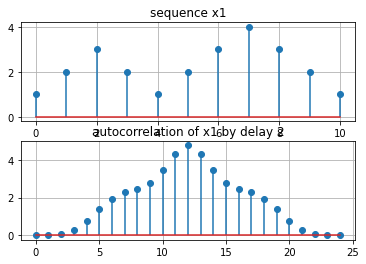

In [21]:
plt.subplot(2,1,1)
plt.stem(x1,use_line_collection=True)
plt.title("sequence x1")
plt.grid()
plt.subplot(2,1,2)
plt.stem(autocorrelation(x1,x1,2),use_line_collection=True)
plt.title("autocorrelation of x1 by delay 2")
plt.grid()
plt.show()

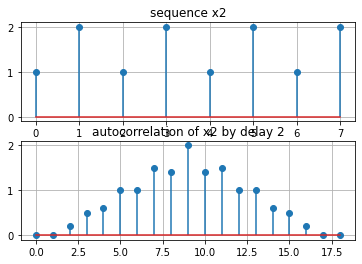

In [22]:
plt.subplot(2,1,1)
plt.stem(x2,use_line_collection=True)
plt.title("sequence x2")
plt.grid()
plt.subplot(2,1,2)
plt.stem(autocorrelation(x2,x2,2),use_line_collection=True)
plt.title("autocorrelation of x2 by delay 2")
plt.grid()
plt.show()

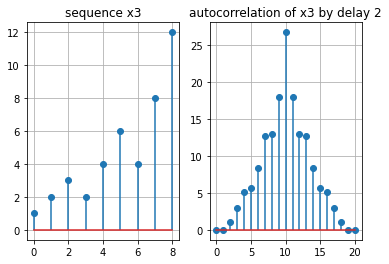

In [23]:
plt.subplot(1,2,1)
plt.stem(x3,use_line_collection=True)
plt.title("sequence x3")
plt.grid()
plt.subplot(1,2,2)
plt.stem(autocorrelation(x3,x3,2),use_line_collection=True)
plt.title("autocorrelation of x3 by delay 2")
plt.grid()
plt.show()

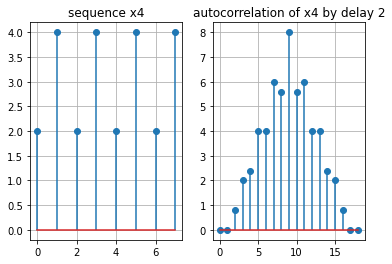

In [24]:
plt.subplot(1,2,1)
plt.stem(x4,use_line_collection=True)
plt.title("sequence x4")
plt.grid()
plt.subplot(1,2,2)
plt.stem(autocorrelation(x4,x4,2),use_line_collection=True)
plt.title("autocorrelation of x4 by delay 2")
plt.grid()
plt.show()

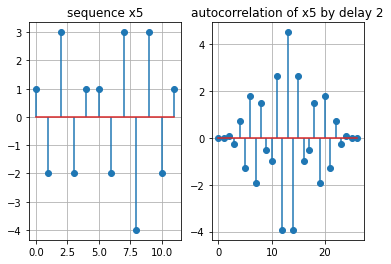

In [25]:
plt.subplot(1,2,1)
plt.stem(x5,use_line_collection=True)
plt.title("sequence x5")
plt.grid()
plt.subplot(1,2,2)
plt.grid()
plt.stem(autocorrelation(x5,x5,2),use_line_collection=True)
plt.title("autocorrelation of x5 by delay 2")
plt.show()

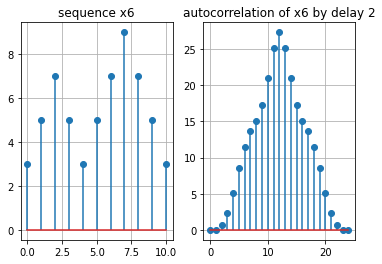

In [26]:
plt.subplot(1,2,1)
plt.stem(x6,use_line_collection=True)
plt.title("sequence x6")
plt.grid()
plt.subplot(1,2,2)
plt.stem(autocorrelation(x6,x6,2),use_line_collection=True)
plt.title("autocorrelation of x6 by delay 2")
plt.grid()
plt.show()

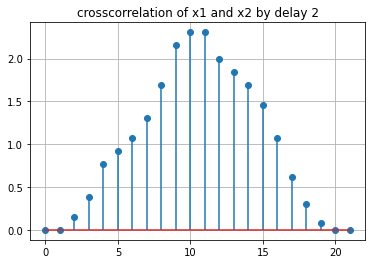

In [27]:

plt.stem(autocorrelation(x1,x2,2),use_line_collection=True)
plt.title("crosscorrelation of x1 and x2 by delay 2")
plt.grid()
plt.show()

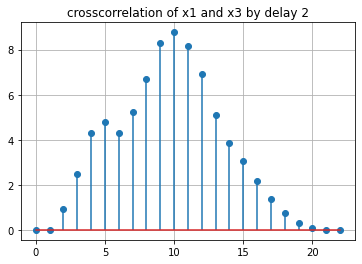

In [28]:
plt.stem(autocorrelation(x1,x3,2),use_line_collection=True)
plt.title("crosscorrelation of x1 and x3 by delay 2")
plt.grid()
plt.show()

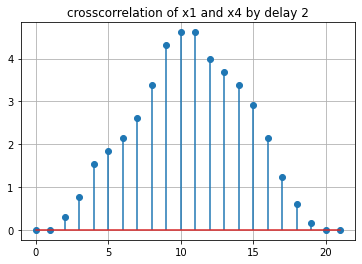

In [29]:
plt.stem(autocorrelation(x1,x4,2),use_line_collection=True)
plt.title("crosscorrelation of x1 and x4 by delay 2")
plt.grid()
plt.show()

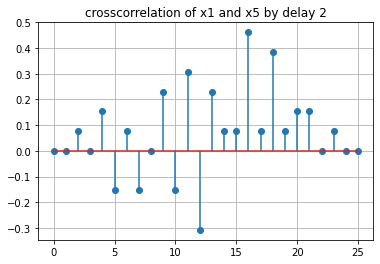

In [30]:
plt.stem(autocorrelation(x1,x5,2),use_line_collection=True)
plt.title("crosscorrelation of x1 and x5 by delay 2")
plt.grid()
plt.show()

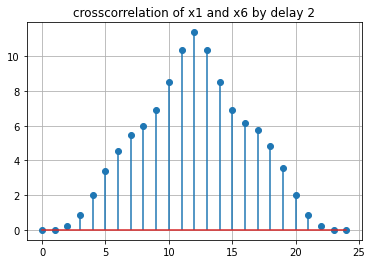

In [31]:
plt.stem(autocorrelation(x1,x6,2),use_line_collection=True)
plt.title("crosscorrelation of x1 and x6 by delay 2")
plt.grid()
plt.show()

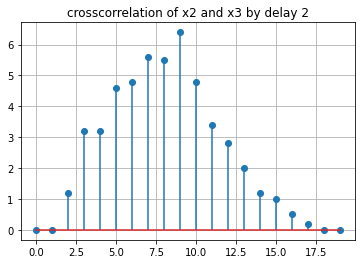

In [32]:
plt.stem(autocorrelation(x2,x3,2),use_line_collection=True)
plt.title("crosscorrelation of x2 and x3 by delay 2")
plt.grid()
plt.show()

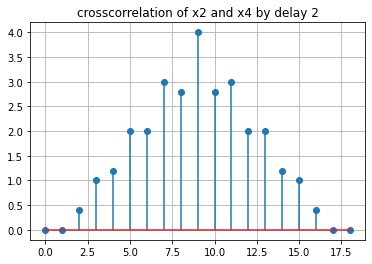

In [33]:
plt.stem(autocorrelation(x2,x4,2),use_line_collection=True)
plt.title("crosscorrelation of x2 and x4 by delay 2")
plt.grid()
plt.show()

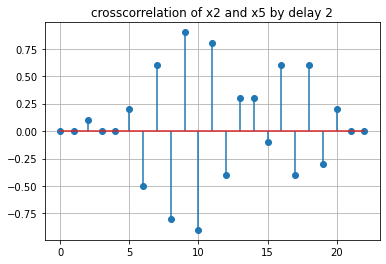

In [34]:
plt.stem(autocorrelation(x2,x5,2),use_line_collection=True)
plt.title("crosscorrelation of x2 and x5 by delay 2")
plt.grid()
plt.show()

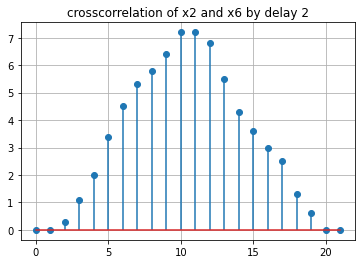

In [35]:
plt.stem(autocorrelation(x2,x6,2),use_line_collection=True)
plt.title("crosscorrelation of x2 and x6 by delay 2")
plt.grid()
plt.show()

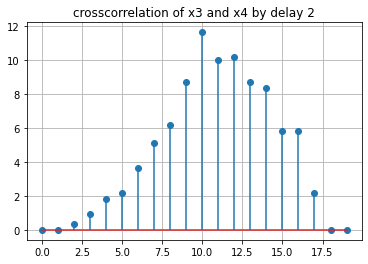

In [36]:
plt.stem(autocorrelation(x3,x4,2),use_line_collection=True)
plt.title("crosscorrelation of x3 and x4 by delay 2")
plt.grid()
plt.show()

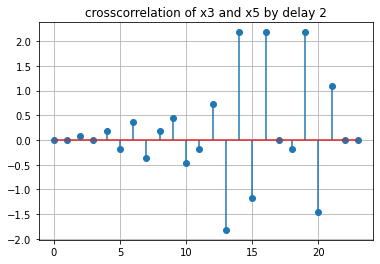

In [37]:
plt.stem(autocorrelation(x3,x5,2),use_line_collection=True)
plt.title("crosscorrelation of x3 and x5 by delay 2")
plt.grid()
plt.show()

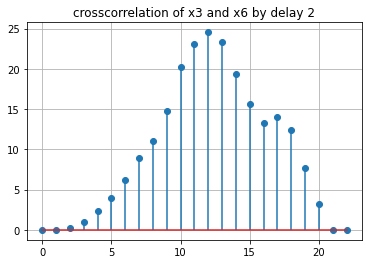

In [38]:
plt.stem(autocorrelation(x3,x6,2),use_line_collection=True)
plt.title("crosscorrelation of x3 and x6 by delay 2")
plt.grid()
plt.show()

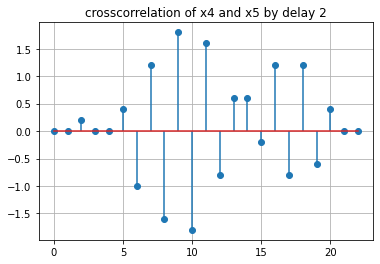

In [39]:
plt.stem(autocorrelation(x4,x5,2),use_line_collection=True)
plt.title("crosscorrelation of x4 and x5 by delay 2")
plt.grid()
plt.show()

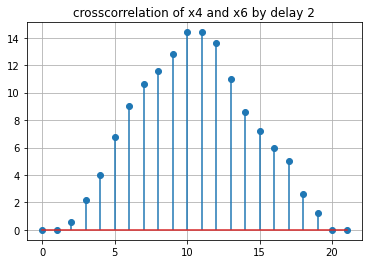

In [40]:
plt.stem(autocorrelation(x4,x6,2),use_line_collection=True)
plt.title("crosscorrelation of x4 and x6 by delay 2")
plt.grid()
plt.show()

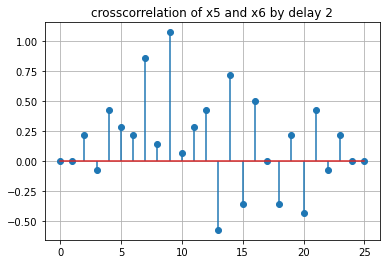

In [41]:
plt.stem(autocorrelation(x5,x6,2),use_line_collection=True)
plt.title("crosscorrelation of x5 and x6 by delay 2")
plt.grid()
plt.show()

# **NOISE**

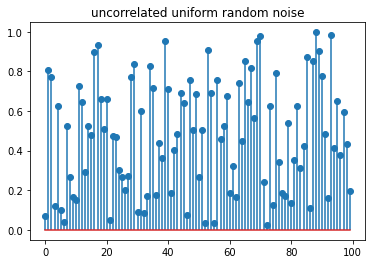

In [42]:
n=100
s1=np.random.rand(n)
plt.stem(s1,use_line_collection=True)
plt.title("uncorrelated uniform random noise")
plt.show()



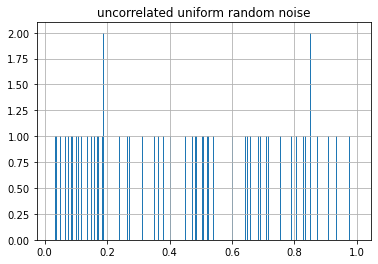

In [43]:
plt.hist(s1,500)
plt.title("uncorrelated uniform random noise")
plt.grid()
plt.show()

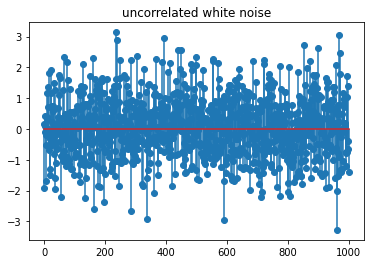

In [44]:

from random import gauss
white = [gauss(0.0, 1.0) for i in range(1000)]
plt.stem(white,use_line_collection=True)
plt.title("uncorrelated white noise")
plt.show()

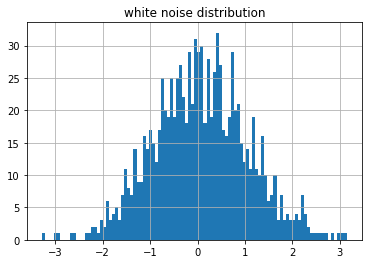

In [45]:
plt.hist(white,100)
plt.title("white noise distribution")
plt.grid()
plt.show()

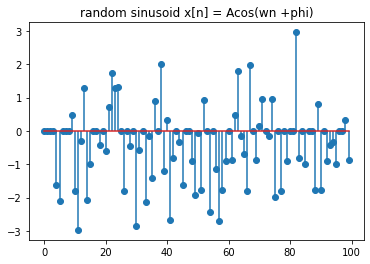

In [46]:
import random
dt = 0.1/100
sig=[(random.randrange(0,4))*np.cos(2*np.pi*i*100*dt+(random.randrange(0,360,30))) for i in range(0,100)]
plt.stem(sig,use_line_collection=True)
plt.title("random sinusoid x[n] = Acos(wn +phi)")
plt.show()

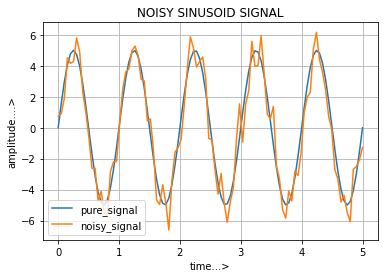

In [47]:
t=np.linspace(0,5,100)
pure_sig=[5*np.sin(2*np.pi*i) for i in t]
noise = [gauss(0.0, 1.0) for i in range(100)]
noise_sig=[noise[i]+pure_sig[i] for i in range(100)]
plt.plot(t,pure_sig,label="pure_signal")
plt.plot(t,noise_sig,label="noisy_signal")
plt.title("NOISY SINUSOID SIGNAL")
plt.xlabel("time...>")
plt.ylabel("amplitude....>")
plt.legend()
plt.grid()
plt.show()

In [48]:
from skimage import data
from skimage.color import rgb2gray
from skimage.io import imread
import glob
import numpy
from skimage.util import random_noise
import cv2

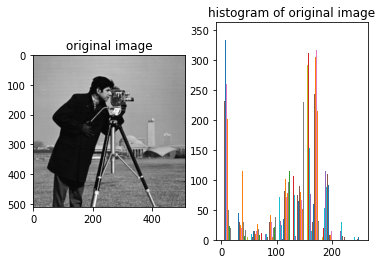

In [49]:
image = data.camera()  
type(image)
numpy.ndarray #Image is a NumPy array: 
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.hist(image)
plt.title("histogram of original image")
plt.show()

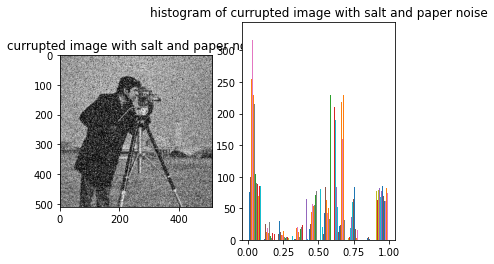

In [50]:
noise_img = random_noise(image, mode='s&p',amount=0.3)
plt.subplot(1,2,1)
plt.imshow(noise_img, cmap='gray')
plt.title("currupted image with salt and paper noise")
plt.subplot(1,2,2)
plt.hist(noise_img)
plt.title("histogram of currupted image with salt and paper noise")
plt.show()



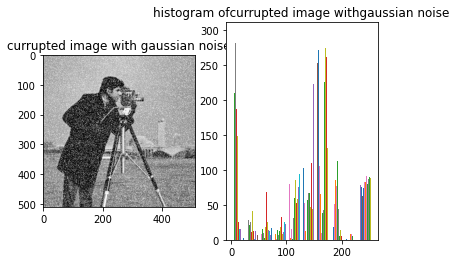

In [51]:
gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(image,gauss)
# Display the image
plt.subplot(1,2,1)
plt.imshow(img_gauss,cmap='gray')
plt.title("currupted image with gaussian noise")
plt.subplot(1,2,2)
plt.hist(img_gauss)
plt.title("histogram ofcurrupted image withgaussian noise")
plt.show()

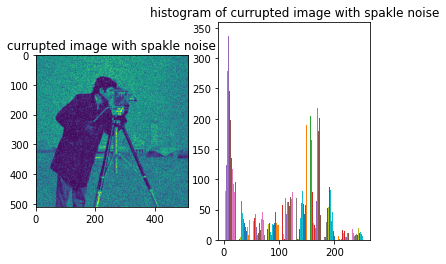

In [52]:
noise_img = image+image*gauss
plt.subplot(1,2,1)
plt.imshow(noise_img)
plt.title("currupted image with spakle noise")
plt.subplot(1,2,2)
plt.hist(noise_img)
plt.title("histogram of currupted image with spakle noise")
plt.show()

using filtering operation we can remove noise from image. for above type of noise we can use median,gaussian,hybrid median or wienner filter.